# Ref: https://dojo.qulacs.org/ja/latest/notebooks/3.2_Qiskit_IBMQ.html

In [6]:
!pip install qiskit==2.1.1
# !pip install qiskit_ibm_provider # not work at qiskit 2.0
!pip install qiskit_ibm_runtime==0.40.1 # for remote real quantum machines
!pip install qiskit-aer==0.17.1 # for local quantum simulators

# 必要なモジュールのインポート

In [7]:
from qiskit import QuantumCircuit#, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
# from qiskit_ibm_provider import IBMProvider # deprecated, see https://docs.quantum.ibm.com/migration-guides/qiskit-runtime-from-ibm-provider
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# local quantum simulator

AerSimulator result: Result(backend_name='aer_simulator', backend_version='0.17.1', job_id='e0414598-d0e2-43c6-a928-4ef32c35bc66', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 505, '0x3': 519}), header={'creg_sizes': [['c', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-173', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=3106955075, metadata={'time_taken': 0.001876898, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000545514, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12977, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0.001876898)], d

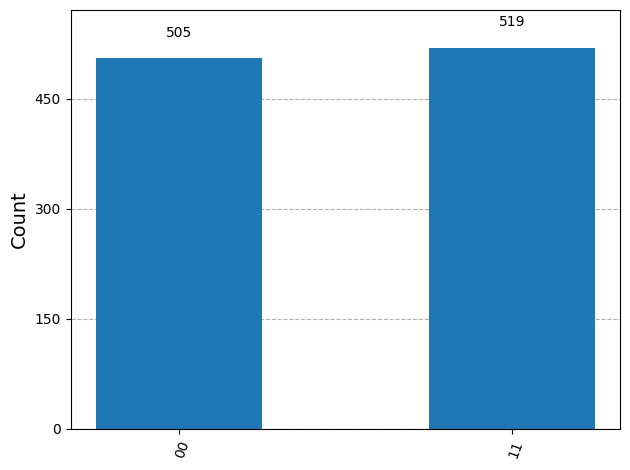

In [8]:
# #量子レジスタqを生成する。
# q = QuantumRegister(2)
# #古典レジスタcを生成する
# c = ClassicalRegister(2)
# #量子レジスタqと古典レジスタc間で量子回路を生成する。
# qc = QuantumCircuit(q, c)

qc = QuantumCircuit(2, 2)

#1番目の量子ビットにHゲートをかける。
# qc.h(q[0])
qc.h(0)

#1-2番目の量子ビットにCNOTゲートをかける。(1番目の量子ビットが制御量子ビット、2番目の量子ビットがコントロール量子ビット)
# qc.cx(q[0],q[1])
qc.cx(0,1)

#1番目の量子ビットの測定値を1番目の古典ビットに、2番目の量子ビットの測定値を2番目の古典ビットに渡す。
# qc.measure(q[0], c[0])
# qc.measure(q[1], c[1])
qc.measure([0,1], [0,1])

# quantum simulator
result = AerSimulator().run(qc).result()
print(f"AerSimulator result: {result}")
statistics = result.get_counts()
print(f"AerSimulator counts: {statistics}")
display(plot_histogram(statistics))

# real quantum machine

In [9]:
# Save account credentials. (required for the first time)
# IBMProvider.save_account(token="2b842adc5951f4f4feabc60c307ea6a32b5469003d75d24a0b722ded4131699f4eef6f0debef3b2235cc9b54d8b2994792f37d1ac0c3e0e88ed18319734f56be")
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="2b842adc5951f4f4feabc60c307ea6a32b5469003d75d24a0b722ded4131699f4eef6f0debef3b2235cc9b54d8b2994792f37d1ac0c3e0e88ed18319734f56be", overwrite=True, set_as_default=True) # account=google
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="d6ce530ed68c2d1f136d68669deddd5c00513ed6084f3a9b0d13b8d09364e2ee3c8006b8e7e9db57685598290f380e65c4051ad927cd4038818f79fae8e69e40", overwrite=True, set_as_default=True) # account=hu@cc.u-tokyo.ac.jp
token = "0L5XDSal-ds4SdmvlC41WXIIBU75O7OexXu3-r8MV5eI"
QiskitRuntimeService.save_account(
   token=token,
   channel="ibm_cloud", # `channel` distinguishes between different account types.
   # Optionally copy the instance CRN or name from the Instance section on the dashboard.
  #  instance="crn:v1:bluemix:public:quantum-computing:us-east:a/fc93289da39b4de6b7c94ee611ed4500:f772d834-cb6f-4b8f-841e-87f277d08e87::", # NEDO_PROJECT_03
   instance="crn:v1:bluemix:public:quantum-computing:us-east:a/fc93289da39b4de6b7c94ee611ed4500:a026cf45-9b9f-4135-b74d-b9c05a933bcc::", # NEDO_PROJECT_03-dedicated
   name="test", # Optionally name this set of credentials.
   overwrite=True, # Only needed if you already have Cloud credentials.
   set_as_default=True, # Only needed if you want these credentials to be used as the default account.
   # This is recommended if you have an IQP classic account set as the default.
)

# Load a previously saved account.
# provider = IBMProvider()
# provider.backends()
service = QiskitRuntimeService()

# backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127) # randomly pick one qpu
backend = service.backend("ibm_kobe") # qpus: https://quantum.cloud.ibm.com/computers
print(f"Backend: {backend}")

Backend: <IBMBackend('ibm_kobe')>


qc:         ┌───┐     ┌─┐    ░ ┌─┐   
   q_0: ┤ H ├──■──┤M├────░─┤M├───
        └───┘┌─┴─┐└╥┘┌─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─╫─┤M├─░──╫─┤M├
             └───┘ ║ └╥┘ ░  ║ └╥┘
   c: 2/═══════════╩══╩═════╬══╬═
                   0  1     ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
isa_circuit: global phase: 3π/4
         ┌─────────┐┌────┐┌─────────┐              ┌─┐                     ░ »
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─■────────────┤M├─────────────────────░─»
         ├─────────┤├────┤├─────────┤ │ ┌─────────┐└╥┘┌────┐┌─────────┐┌─┐ ░ »
q_1 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─■─┤ Rz(π/2) ├─╫─┤ √X ├┤ Rz(π/2) ├┤M├─░─»
         └─────────┘└────┘└─────────┘   └─────────┘ ║ └────┘└─────────┘└╥┘ ░ »
    c: 2/═══════════════════════════════════════════╩═══════════════════╩════»
                                                    0                   1    »
 meas: 2/════════════════════════════════════════════════════════════════════»
                          

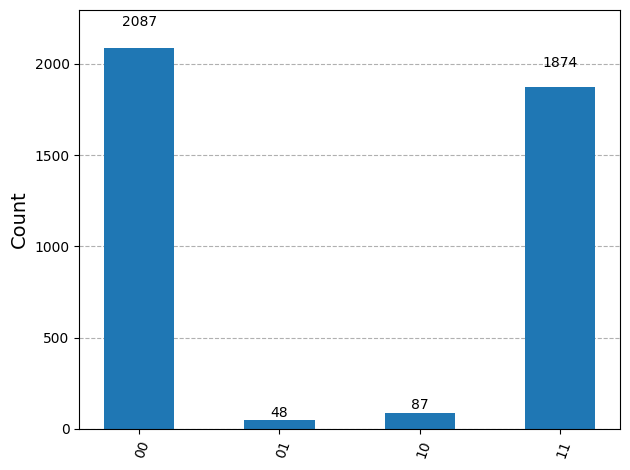

In [10]:
# backend = provider.get_backend("ibm_brisbane")
# compiled_circuit = transpile(qc, backend)
# job = backend.run(compiled_circuit)

qc.measure_all()
print(f"qc: {qc}")

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
print(f"isa_circuit: {isa_circuit}")

sampler = Sampler(backend)
print(f"sampler: {sampler}")
job = sampler.run([isa_circuit])
result = job.result()
print(f"Backend result: {result}")
counts = result[0].data.meas.get_counts()
print(f"Backend counts: {counts}")

display(plot_histogram(counts))